In [1]:
# 데이터 준비
import pandas as pd
import numpy as np

df = pd.read_excel('귤품질정보.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    105 non-null    datetime64[ns]
 1   Sour    105 non-null    float64       
 2   Sweet   105 non-null    float64       
 3   Flesh   105 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.4 KB


In [2]:
#날짜 분리
# Datetime 타입인 '날짜' 칼럼에서 연도값을 가져와 'Year'칼럼으로 추가
df['Year']=df['Date'].dt.year
# Datetime 타입인 '날짜' 칼럼에서 월 값을 가져와 'Month'칼럼으로 추가
df['Month']=df['Date'].dt.month
# Datetime 타입인 '날짜' 칼럼에서 일 값을 가져와 'Day'칼럼으로 추가
df['Day']=df['Date'].dt.day
df

,Date,Sour,Sweet,Flesh,Year,Month,Day
0,2010-08-05,3.41,6.54,57.70,2010,8,5
1,2010-08-06,3.75,6.50,60.46,2010,8,6
2,2010-08-18,3.34,6.36,68.21,2010,8,18
3,2010-08-31,2.92,6.17,73.65,2010,8,31
4,2010-09-16,2.29,6.52,79.37,2010,9,16
...,...,...,...,...,...,...,...
100,2021-10-01,1.10,7.67,83.75,2021,10,1
101,2021-10-15,0.93,8.39,83.15,2021,10,15
102,2021-11-01,0.90,9.16,81.93,2021,11,1
103,2021-11-15,0.90,9.31,81.12,2021,11,15


In [3]:
#상관도 출력
df.corr()

,Date,Sour,Sweet,Flesh,Year,Month,Day
Date,1.000000,-0.174492,0.078474,0.121207,0.999618,0.153971,-0.269762
Sour,-0.174492,1.000000,-0.761465,-0.829606,-0.148696,-0.927995,-0.251077
Sweet,0.078474,-0.761465,1.000000,0.526759,0.055484,0.830212,0.192191
Flesh,0.121207,-0.829606,0.526759,1.000000,0.102154,0.681480,0.193823
Year,0.999618,-0.148696,0.055484,0.102154,1.000000,0.127384,-0.279312
Month,0.153971,-0.927995,0.830212,0.681480,0.127384,1.000000,0.085079
Day,-0.269762,-0.251077,0.192191,0.193823,-0.279312,0.085079,1.000000


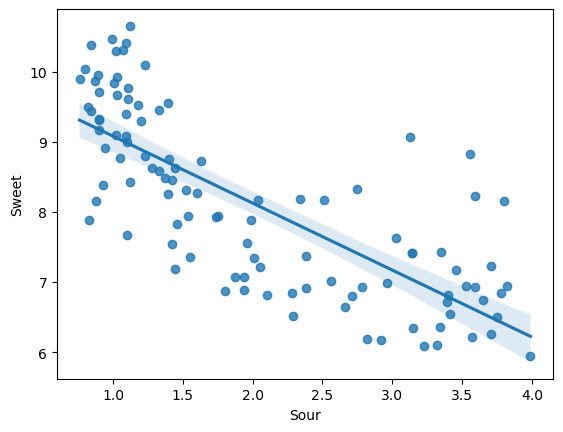

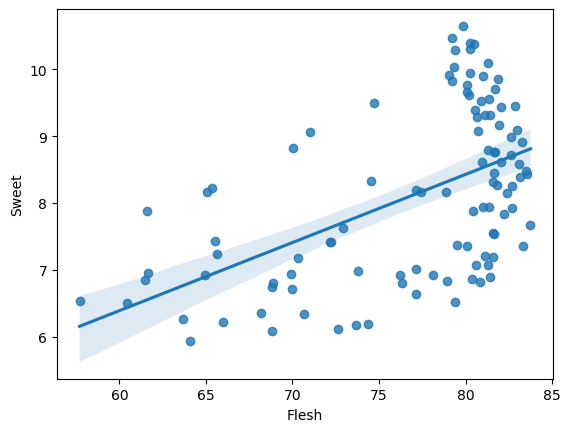

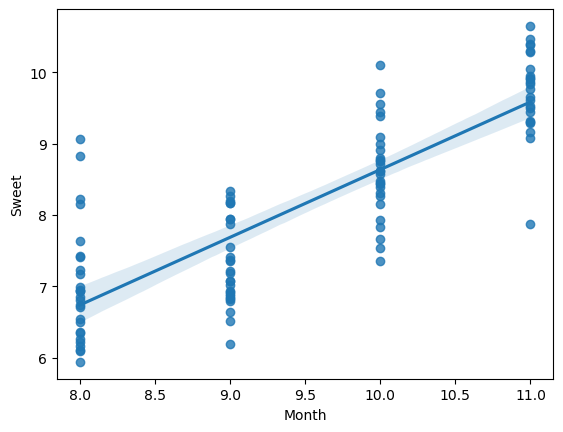

In [4]:
#그래프로 살펴보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Sour', y='Sweet', data=df)
plt.show()
sns.regplot(x='Flesh', y='Sweet', data=df)
plt.show()
sns.regplot(x='Month', y='Sweet', data=df)
plt.show()

In [5]:
#학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

#데이터프레임에서 당도칼럼을 가져와 정답 칼럼(종속변수)을 갖는 변수 y로 저장 
y = df['Sweet']
#데이터프레임에서 산도, 월 칼럼을 가져와 속성칼럼(독립변수)을 갖는 변수 x로 저장
x = df[['Sour','Flesh', 'Month','Day']]
#x = df[['Flesh', 'Month','Day']]
#훈련데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
                                                    random_state=0)